In [2]:
pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [5]:
# Reshape image data (100x100 RGB images)
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)

# Reshape labels
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


# Data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(X_train)

In [6]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


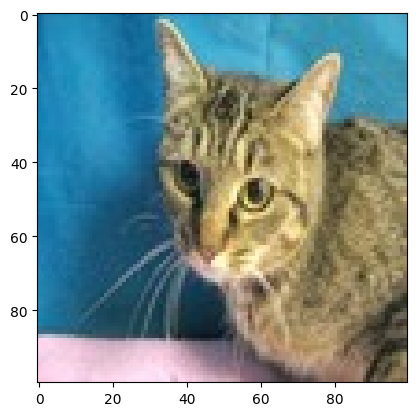

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:


model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
model.fit(datagen.flow(X_train,Y_train,batch_size=32),
          epochs=5,
          validation_data=(X_test,Y_test),
          verbose=1)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 911ms/step - accuracy: 0.5150 - loss: 0.7160 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 674ms/step - accuracy: 0.5080 - loss: 0.6929 - val_accuracy: 0.6150 - val_loss: 0.6923
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 668ms/step - accuracy: 0.5045 - loss: 0.6936 - val_accuracy: 0.5025 - val_loss: 0.6931
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 697ms/step - accuracy: 0.4945 - loss: 0.6929 - val_accuracy: 0.5050 - val_loss: 0.6913
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - accuracy: 0.5105 - loss: 0.6923 - val_accuracy: 0.5575 - val_loss: 0.6911


In [13]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5575 - loss: 0.6911


[0.6910673379898071, 0.5575000047683716]

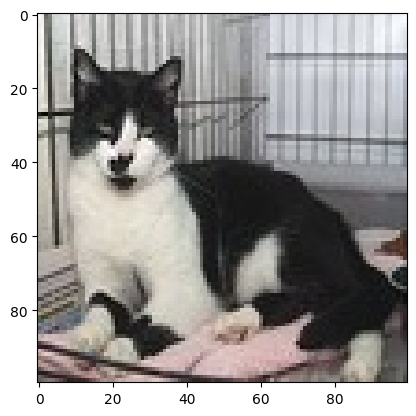

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Our model says it is a : dog


In [17]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

Y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
Y_pred = Y_pred > 0.5

if (Y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [18]:
model.save('model.h5')
print('saved model to model.h5')

saved model to model.h5
